#Regression MLP Architecture

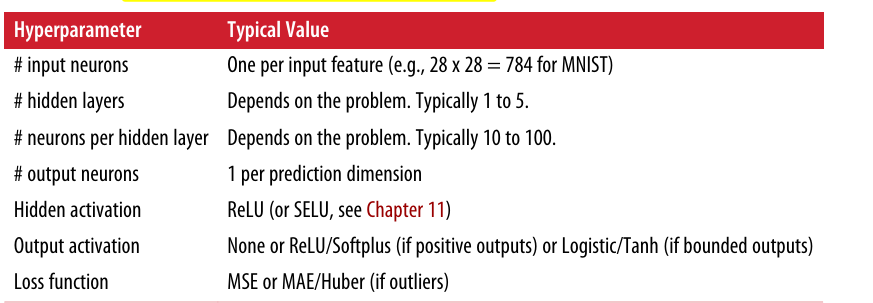

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber

def create_mlp_regression(input_shape, num_hidden_layers, neurons_per_layer, output_dim, hidden_activation='relu', output_activation=None, loss='mse'):
    # Initialize a sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(neurons_per_layer, input_shape=input_shape))
    model.add(Activation(hidden_activation))

    # Add hidden layers
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(neurons_per_layer))
        model.add(Activation(hidden_activation))

    # Add output layer
    model.add(Dense(output_dim))
    if output_activation:
        model.add(Activation(output_activation))

    # Compile the model with the specified loss function
    if loss == 'mse':
        loss_function = MeanSquaredError()
    elif loss == 'mae':
        loss_function = MeanAbsoluteError()
    elif loss == 'huber':
        loss_function = Huber()
    else:
        raise ValueError("Unsupported loss function.")

    model.compile(optimizer='adam', loss=loss_function)

    return model



In [18]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define the hyperparameters
input_neurons = X_train.shape[1]  # Number of input features
num_hidden_layers = 3
neurons_per_layer = 64
output_dim = 1  # Output neurons for regression
hidden_activation = 'relu'
output_activation = None
loss = 'mse'

# Create and compile the MLP regression model
model = create_mlp_regression(input_shape=(input_neurons,),
                               num_hidden_layers=num_hidden_layers,
                               neurons_per_layer=neurons_per_layer,
                               output_dim=output_dim,
                               hidden_activation=hidden_activation,
                               output_activation=output_activation,
                               loss=loss)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.1)

# Display model summary
model.summary()

Epoch 1/50
117/117 [==============================] - 2s 6ms/step - loss: 1.6761 - val_loss: 0.7355
Epoch 2/50
117/117 [==============================] - 1s 4ms/step - loss: 0.6030 - val_loss: 0.6126
Epoch 3/50
117/117 [==============================] - 1s 4ms/step - loss: 0.5591 - val_loss: 0.5866
Epoch 4/50
117/117 [==============================] - 1s 5ms/step - loss: 0.5363 - val_loss: 0.5635
Epoch 5/50
117/117 [==============================] - 0s 3ms/step - loss: 0.5050 - val_loss: 0.5467
Epoch 6/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4813 - val_loss: 0.5101
Epoch 7/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4638 - val_loss: 0.4929
Epoch 8/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4484 - val_loss: 0.4836
Epoch 9/50
117/117 [==============================] - 0s 2ms/step - loss: 0.4424 - val_loss: 0.5094
Epoch 10/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4305 - val_loss: 0.4656

In [21]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")

129/129 [==============================] - 1s 5ms/step - loss: 0.3571
Test Loss: 0.35713303089141846


#CLassification MLP Architecture

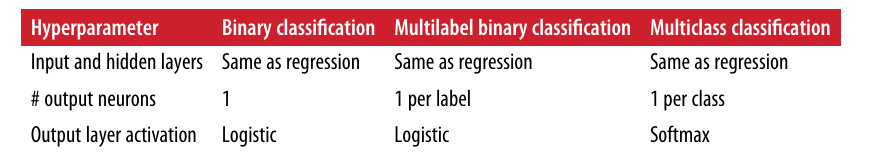

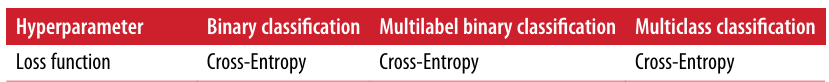

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy

def create_mlp_classification(input_shape, num_hidden_layers, neurons_per_layer, output_dim, classification_type='binary', loss='crossentropy'):
    # Initialize a sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(neurons_per_layer, input_shape=input_shape))
    model.add(Activation('relu'))

    # Add hidden layers
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(neurons_per_layer))
        model.add(Activation('relu'))

    # Determine output layer configuration based on classification type
    if classification_type == 'binary':
        # Binary classification
        output_activation = 'sigmoid'
        output_neurons = 1
        if loss == 'crossentropy':
            loss_function = BinaryCrossentropy()
        else:
            raise ValueError("Unsupported loss function for binary classification.")
    elif classification_type == 'multilabel':
        # Multilabel binary classification
        output_activation = 'sigmoid'
        output_neurons = output_dim
        if loss == 'crossentropy':
            loss_function = BinaryCrossentropy()
        else:
            raise ValueError("Unsupported loss function for multilabel binary classification.")
    elif classification_type == 'multiclass':
        # Multiclass classification
        output_activation = 'softmax'
        output_neurons = output_dim
        if loss == 'crossentropy':
            loss_function = SparseCategoricalCrossentropy()
        else:
            raise ValueError("Unsupported loss function for multiclass classification.")
    else:
        raise ValueError("Unsupported classification type.")

    # Add output layer
    model.add(Dense(output_neurons))
    model.add(Activation(output_activation))

    # Compile the model with the specified loss function
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    return model

In [25]:
from sklearn.datasets import make_classification, make_multilabel_classification

# Binary classification example
X_binary, y_binary = make_classification(n_samples=1000, n_features=784, n_informative=500, n_classes=2, random_state=42)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

binary_model = create_mlp_classification(input_shape=(X_binary_train.shape[1],),
                                          num_hidden_layers=3,
                                          neurons_per_layer=64,
                                          output_dim=1,
                                          classification_type='binary',
                                          loss='crossentropy')

binary_model.fit(X_binary_train, y_binary_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 1s 47ms/step - loss: 3.6441 - accuracy: 0.5264 - val_loss: 1.9837 - val_accuracy: 0.5750
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 1.7193 - accuracy: 0.6069 - val_loss: 1.3347 - val_accuracy: 0.5750
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.4795 - accuracy: 0.8069 - val_loss: 1.6808 - val_accuracy: 0.5500
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3286 - accuracy: 0.8514 - val_loss: 1.3579 - val_accuracy: 0.6000
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0973 - accuracy: 0.9736 - val_loss: 1.0603 - val_accuracy: 0.6500
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.9861 - val_loss: 1.0348 - val_accuracy: 0.6750
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 1.0583 - val_accuracy: 0.6375
Epoch 8/50
6/6 [===========

In [38]:
# Multiclass classification example
X_multiclass, y_multiclass = make_classification(n_samples=1000, n_features=784, n_informative=500, n_classes=10, random_state=42)
X_multiclass_train, X_multiclass_test, y_multiclass_train, y_multiclass_test = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42)

multiclass_model = create_mlp_classification(input_shape=(X_multiclass_train.shape[1],),
                                              num_hidden_layers=3,
                                              neurons_per_layer=64,
                                              output_dim=10,
                                              classification_type='multiclass',
                                              loss='crossentropy')

multiclass_model.layers[-1] = tf.keras.layers.Dense(10, activation='softmax')

multiclass_model.fit(X_multiclass_train, y_multiclass_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 2s 71ms/step - loss: 6.6928 - accuracy: 0.0819 - val_loss: 6.2381 - val_accuracy: 0.1375
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 3.5765 - accuracy: 0.2028 - val_loss: 5.6325 - val_accuracy: 0.1000
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 2.0777 - accuracy: 0.4208 - val_loss: 5.1676 - val_accuracy: 0.1375
Epoch 4/50
6/6 [==============================] - 0s 20ms/step - loss: 1.2980 - accuracy: 0.6181 - val_loss: 4.7953 - val_accuracy: 0.1250
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.8374 - accuracy: 0.7403 - val_loss: 4.6735 - val_accuracy: 0.1125
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.5601 - accuracy: 0.8639 - val_loss: 4.6758 - val_accuracy: 0.1250
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3800 - accuracy: 0.9361 - val_loss: 4.6780 - val_accuracy: 0.1250
Epoch 8/50
6/6 [===========

In [27]:
# Multilabel binary classification example
X_multilabel, y_multilabel = make_multilabel_classification(n_samples=1000, n_features=784, n_classes=5, random_state=42)
X_multilabel_train, X_multilabel_test, y_multilabel_train, y_multilabel_test = train_test_split(X_multilabel, y_multilabel, test_size=0.2, random_state=42)

multilabel_model = create_mlp_classification(input_shape=(X_multilabel_train.shape[1],),
                                              num_hidden_layers=3,
                                              neurons_per_layer=64,
                                              output_dim=5,
                                              classification_type='multilabel',
                                              loss='crossentropy')

multilabel_model.fit(X_multilabel_train, y_multilabel_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 3s 99ms/step - loss: 0.6869 - accuracy: 0.1708 - val_loss: 0.6653 - val_accuracy: 0.1625
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6416 - accuracy: 0.1597 - val_loss: 0.6375 - val_accuracy: 0.1500
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.6109 - accuracy: 0.1528 - val_loss: 0.6211 - val_accuracy: 0.1500
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5902 - accuracy: 0.1806 - val_loss: 0.6104 - val_accuracy: 0.2250
Epoch 5/50
6/6 [==============================] - 0s 36ms/step - loss: 0.5695 - accuracy: 0.3181 - val_loss: 0.6012 - val_accuracy: 0.3625
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.5442 - accuracy: 0.3667 - val_loss: 0.5954 - val_accuracy: 0.3625
Epoch 7/50
6/6 [==============================] - 0s 28ms/step - loss: 0.5140 - accuracy: 0.3542 - val_loss: 0.5897 - val_accuracy: 0.3125
Epoch 8/50
6/6 [===========

In [39]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [40]:
X_train_full.shape

(60000, 28, 28)

In [41]:
X_train_full.dtype

dtype('uint8')

In [42]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [43]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [44]:
class_names[y_train[0]]

'Coat'

In [47]:
X_train.shape

(55000, 28, 28)

In [53]:
y_train.shape

(55000,)

#Implement a Deep Learning Neural Network for Classification:

In [54]:
import tensorflow as tf

# Create the DNN model with Sequential API
model_dnn_multiclass = tf.keras.Sequential()

# Add the input layer
model_dnn_multiclass.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add hidden layers
model_dnn_multiclass.add(tf.keras.layers.Dense(128, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(64, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer for multiclass classification
num_classes = len(class_names)
model_dnn_multiclass.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model_dnn_multiclass.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [56]:
# Train the model
history_dnn_multiclass = model_dnn_multiclass.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3809 - accuracy: 0.8625 - val_loss: 0.3328 - val_accuracy: 0.8800
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3710 - accuracy: 0.8649 - val_loss: 0.3327 - val_accuracy: 0.8754
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3652 - accuracy: 0.8665 - val_loss: 0.3143 - val_accuracy: 0.8840
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3571 - accuracy: 0.8700 - val_loss: 0.3221 - val_accuracy: 0.8848
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3484 - accuracy: 0.8726 - val_loss: 0.3186 - val_accuracy: 0.8824
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3436 - accuracy: 0.8746 - val_loss: 0.3241 - val_accuracy: 0.8800
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3381 - accuracy: 0.8749 - val_loss: 0.3199 - val_accura

In [57]:
model.layers

In [58]:
model.layers[1].name

'activation_6'

In [60]:
model.get_layer('activation_6').name

'activation_6'

In [65]:
for layer in model.layers:
    if isinstance(layer, Dense):  # Check if the layer is Dense
        weights, biases = layer.get_weights()
        print(f"Weights for {layer.name}: {weights.shape}")
        print(weights)
        print(f"Biases for {layer.name}: {biases.shape}")
        print(biases)

Weights for dense_8: (8, 64)
[[ 2.00525001e-02  1.12029172e-01  3.26189073e-03  1.81245074e-01
  -1.83084503e-01 -8.46728683e-02  1.19360089e-02  2.52094358e-01
   1.83393702e-01  2.45307177e-01  1.14940315e-01 -2.02692419e-01
  -2.29095981e-01 -8.17068964e-02  2.60623544e-02  1.55523181e-01
   2.14862317e-01 -5.45929000e-03 -3.55010659e-01 -2.80118883e-02
  -1.29194543e-01 -1.73729315e-01  1.59973443e-01  2.07386598e-01
   9.11200568e-02 -2.40071908e-01  1.70384273e-01 -8.04233551e-03
  -4.36523795e-01  2.71418714e-03  6.13709055e-02  3.33447069e-01
   1.66437328e-01  1.30418822e-01  2.59267449e-01  4.18072343e-02
  -2.17872351e-01  4.41309124e-01 -5.44919707e-02 -5.64410910e-02
   4.76890290e-03 -1.66057736e-01 -2.34183595e-01  2.13078350e-01
   8.88297781e-02 -3.03991903e-02 -2.44610876e-01 -2.90813476e-01
   3.97563010e-01  1.74481347e-01 -2.68585086e-01 -6.42754287e-02
   4.26840782e-03  1.53036371e-01 -7.05714105e-03  7.38492906e-02
   1.51951358e-01  3.07685107e-01 -2.28016879e-

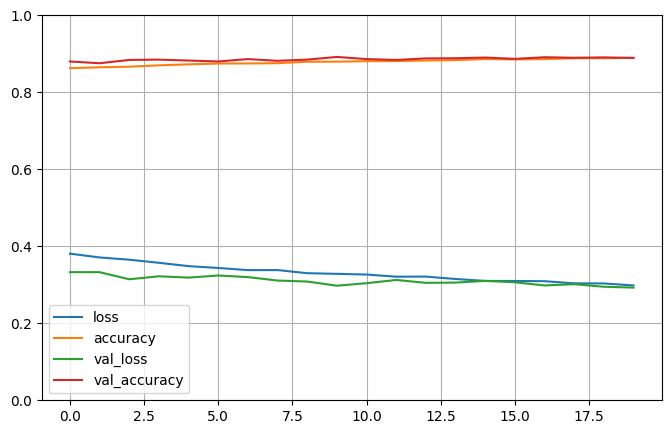

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_dnn_multiclass.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()